<a href="https://colab.research.google.com/github/AmeliaDemianowicz/jezyki-programowania/blob/main/Lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#%matplotlib inline

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# !pip install mpld3
# import mpld3
# mpld3.enable_notebook()

from scipy.integrate import solve_ivp

!pip install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
def deriv(t, y, N, beta, gamma):
  """
    Funkcja oblicza pochodne dla modelu.

    Parametry
    t : float
        Czas
    y : list
        Aktualne wartości [S, I, R], czyli liczby osób podatnych, zarażonych i odpornych.
    N : int
        Całkowita liczba osób w populacji.
    beta : float
        Współczynnik transmisji choroby.
    gamma : float
        Współczynnik wyzdrowień.

    Return
    list
        Pochodne [dS/dt, dI/dt, dR/dt] w danym momencie czasu.
    """
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [ ]:
def solve_and_plot(N, beta, gamma, S0, I0, R0):
  """
    Funkcja rozwiązuje i wizualizuje model SIR dla zadanych parametrów, tworząc wykres.

    Parametry
    N : int
        Całkowita populacja.
    beta : float
        Współczynnik transmisji (prawdopodobieństwo zakażenia).
    gamma : float
        Współczynnik wyzdrowień (odwrotność średniego czasu trwania infekcji).
    S0 : int
        Początkowa liczba osób podatnych.
    I0 : int
        Początkowa liczba osób zarażonych.
    R0 : int
        Początkowa liczba osób odpornych.
    """
  t_span = [0, 30]
  y0 = [S0, I0, R0]

  ret = solve_ivp(deriv, t_span, y0, args=(N, beta, gamma), t_eval=np.linspace(t_span[0], t_span[1], t_span[1]+1))

  t = ret.t
  S, I, R = ret.y

  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Podatni')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Zarażeni')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Odporni')

  ax.set_xlabel('Czas (dni)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)

  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

Zadanie 1

Podstawowy współczynnik reprodukcji R0 = 5.0


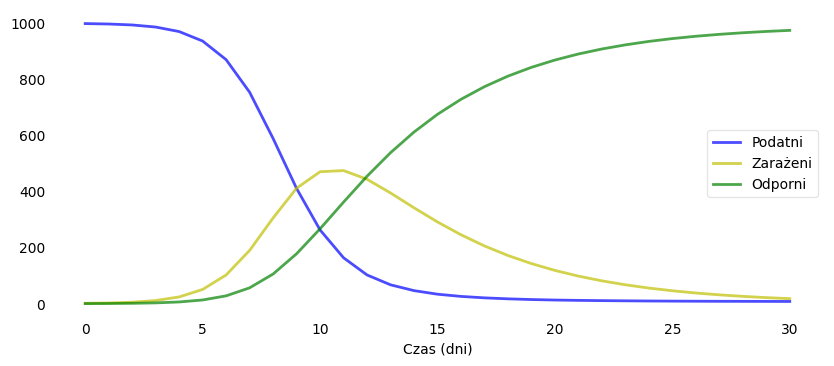

In [ ]:
N = 1000    # populacja
beta = 1  # współczynnik transmisji
D = 5     # czas trwania infekcji
gamma = 1.0 / D # wsp. gamma

S0, I0, R0 = 999, 1, 0  # wartości początkowe

print(f"Podstawowy współczynnik reprodukcji R0 = {beta / gamma}")

solve_and_plot(N, beta, gamma, S0, I0, R0)

Zadanie 2

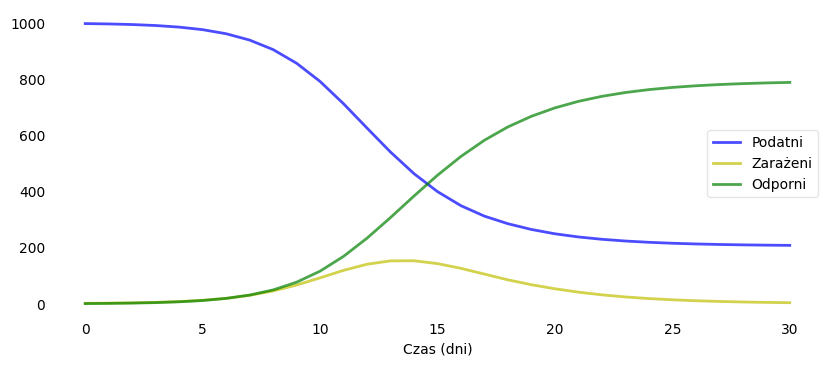

In [ ]:
N = 1000    # populacja
beta = 1  # współczynnik transmisji
D = 2     # czas trwania infekcji
gamma = 1.0 / D # wsp. gamma

S0, I0, R0 = 999, 1, 0  # wartości początkowe

solve_and_plot(N, beta, gamma, S0, I0, R0)

Wnioski:

Wskutek podawania leków przeciwwirusowych i spadnięcia czasu zarażenia do 2 dni, liczba podatnych maleje szybko do ok. 200 osób, co oznacza, że ok. 80% populacji przeszło infekcję. Mimo wszystko, część osób pozostała nienarażona, a epidemia nie ogarnęła całej populacji.

Szczyt liczby zarażonych przypada na 13 dzień i wówczas zarażone zostaje 20% populacji. Odporności nabywa 800 osób, a krzywa odporności rośnie i stabilizuje się, wskazując na zakończenie epidemii. Zakończy się po około 30 dniach, bo osoby zakażone szybko zdrowieją i liczba podatnych szybko się wyczerpuje.

Zadanie 3

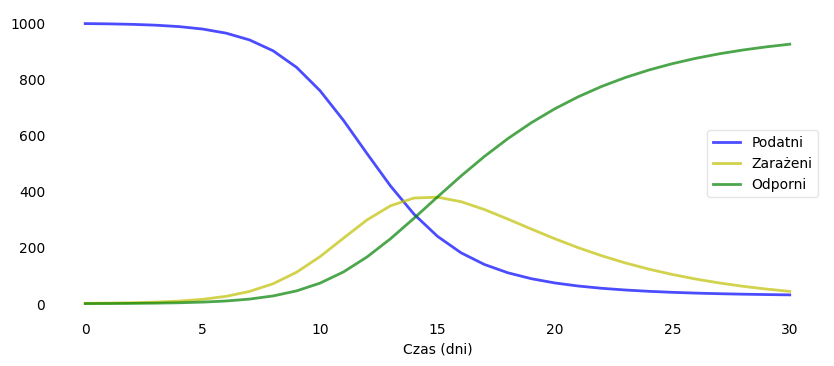

In [ ]:
N = 1000    # populacja
beta = 0.75  # współczynnik transmisji
D = 5     # czas trwania infekcji
gamma = 1.0 / D # wsp. gamma

S0, I0, R0 = 999, 1, 0  # wartości początkowe

solve_and_plot(N, beta, gamma, S0, I0, R0)

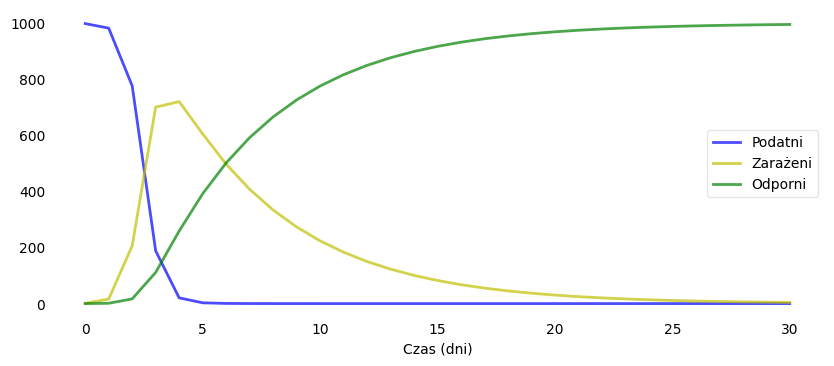

In [ ]:
N = 1000    # populacja
beta = 3  # współczynnik transmisji
D = 5     # czas trwania infekcji
gamma = 1.0 / D # wsp. gamma

S0, I0, R0 = 999, 1, 0  # wartości początkowe

solve_and_plot(N, beta, gamma, S0, I0, R0)

Wnioski:

- Gdy współczynnik transmisji spada do β = 0,75, co odpowiada wartości R₀ = 3,75, epidemia postępuje wolniej i ma łagodniejszy przebieg. Szczyt liczby zarażonych jest niższy, a więcej osób unika infekcji, ponieważ wirus rozprzestrzenia się mniej intensywnie.
- Z kolei, gdy współczynnik transmisji wzrasta do β = 3 (R₀ = 15), epidemia staje się bardzo gwałtowna. Liczba zarażonych osiąga szczyt już około 4. dnia i wynosi wówczas ponad 700 osób, co oznacza, że ponad 70% populacji jest jednocześnie chora. Krzywa zarażonych opada równie szybko, jak rosła, ponieważ niemal cała populacja została już zainfekowana. Liczba osób podatnych spada błyskawicznie do zera w ciągu pierwszych kilku dni, a praktycznie cała populacja przechodzi infekcję i staje się odporna.

Zadanie 4

Wymagany poziom populacji w chwili (R0) do odporności środowiskowej = -25.00%


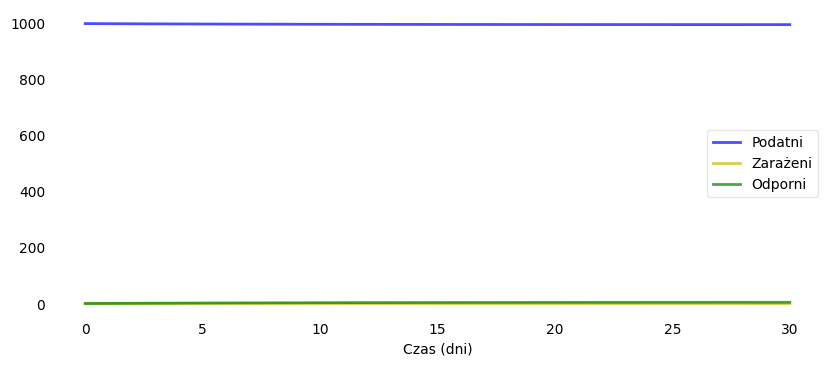

In [ ]:
N = 1000    # populacja
beta = 0.4  # współczynnik transmisji
D = 2     # czas trwania infekcji
gamma = 1.0 / D # wsp. gamma

S0, I0, R0 = 999, 1, 0  # wartości początkowe
threshold = 1.0 - (1.0  / (beta / gamma))

print(f"Wymagany poziom populacji w chwili (R0) do odporności środowiskowej = {threshold*100:.2f}%")


solve_and_plot(N, beta, gamma, S0, I0, R0)

Wnioski:

- Dla takiego przypadku epidemia nie rozwija się. Wartość R₀ jest mniejsza niż 1 (-25%), każda zarażona osoba zaraża średnio mniej niż jedną kolejną, co prowadzi do wygasania infekcji już na starcie. Na wykresie linia niebieska pozostaje przez cały czas niemal stała i bliska 1000, natomiast liczba zarażonych i odpornych (linie żółta i zielona) pozostaje równa zeru. Oznacza to, że wirus nie ma zdolności do rozprzestrzeniania się w populacji, a nawet początkowe przypadki nie są w stanie wywołać epidemii. Nie ma konieczności zapewniania odpornosci zbiorowiskowej.